<a href="https://colab.research.google.com/github/ashutoshkainthola/GBR/blob/main/Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import *
from google.colab import files
uploaded = files.upload()

Saving ppv.csv to ppv.csv


In [ ]:

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['ppv.csv']))
print(df)

df.columns

X= df.drop("Output", axis =1)
y = df["Output"]

X.shape
y.shape

     Input1  Input2  Input4  Input5  Input6  Input7  Output
0      5.63      30    1.14    0.80      32     400   1.546
1      5.50      30    1.15    0.77      56     400   2.325
2      1.17      28    1.15    0.48      15     400   2.325
3      2.10      30    1.00    0.85      11     400   0.725
4      2.10      30    1.00    0.90      11     400   0.725
..      ...     ...     ...     ...     ...     ...     ...
413    3.00      30    1.14    0.74       7     200   1.847
414    7.40      33    1.15    1.35      20     200   2.254
415    4.10      30    1.17    0.50      29     200   3.216
416    5.00      28    1.20    0.54      40     200   4.336
417    5.00      30    1.20    1.00      40     200   4.265

[418 rows x 7 columns]


(418,)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Define the objective function to minimize (mean squared error)
def objective_function(params, X_train, X_test, y_train, y_test):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])

    # Create a random forest regressor with the specified hyperparameters
    regressor = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      random_state=42)

    # Train the regressor
    regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    return mse




1.2246467991473532e-16


In [ ]:
# Define the bounds for each hyperparameter
bounds = [(10, 100),  # n_estimators
          (5, 30),    # max_depth
          (2, 10)]    # min_samples_split

# Set the number of particles and maximum number of iterations
n_particles = 10
max_iter = 50

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the swarm
particles = np.random.uniform(low=np.array(bounds)[:, 0],
                              high=np.array(bounds)[:, 1],
                              size=(n_particles, len(bounds)))

# Perform particle swarm optimization
best_params = None
best_mse = float('inf')

for _ in range(max_iter):
    for i in range(n_particles):
        # Update the particle's velocity and position
        velocity = np.random.random(size=len(bounds)) * (particles[i] - particles).mean(axis=0)
        particles[i] += velocity

        # Clip the particle's position to the defined bounds
        particles[i] = np.clip(particles[i], np.array(bounds)[:, 0], np.array(bounds)[:, 1])

        # Evaluate the objective function for the particle's position
        mse = objective_function(particles[i], X_train, X_test, y_train, y_test)

        # Update the best position and best MSE
        if mse < best_mse:
            best_params = particles[i]
            best_mse = mse

# Print the best hyperparameters and corresponding MSE
print('Best Hyperparameters:')
print('n_estimators:', int(best_params[0]))
print('max_depth:', int(best_params[1]))
print('min_samples_split:', int(best_params[2]))
print('Best MSE:', best_mse)

Best Hyperparameters:
n_estimators: 100
max_depth: 30
min_samples_split: 2
Best MSE: 0.09451167876373946


Best Hyperparameters:
n_estimators: 100
max_depth: 5
min_samples_split: 2
Best R2 Score: 0.9544455750528219


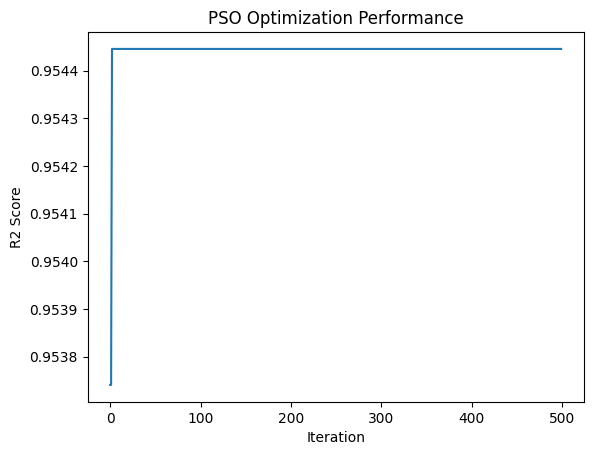

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Define the objective function to maximize (R2 score)
def objective_function(params, X_train, X_test, y_train, y_test):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])

    # Create a random forest regressor with the specified hyperparameters
    regressor = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      random_state=42)

    # Train the regressor
    regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Calculate the R2 score
    r2 = r2_score(y_test, y_pred)

    return -r2  # Minimize negative R2 score for maximization

# Define the bounds for each hyperparameter
bounds = [(10, 100),  # n_estimators
          (5, 30),    # max_depth
          (2, 10)]    # min_samples_split

# Set the number of particles and maximum number of iterations
n_particles = 40
max_iter = 500

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the swarm
particles = np.random.uniform(low=np.array(bounds)[:, 0],
                              high=np.array(bounds)[:, 1],
                              size=(n_particles, len(bounds)))

# Perform particle swarm optimization
best_params = None
best_r2 = float('-inf')
iteration_r2 = []

for _ in range(max_iter):
    for i in range(n_particles):
        # Update the particle's velocity and position
        velocity = np.random.random(size=len(bounds)) * (particles[i] - particles).mean(axis=0)
        particles[i] += velocity

        # Clip the particle's position to the defined bounds
        particles[i] = np.clip(particles[i], np.array(bounds)[:, 0], np.array(bounds)[:, 1])

        # Evaluate the objective function for the particle's position
        r2 = -objective_function(particles[i], X_train, X_test, y_train, y_test)

        # Update the best position and best R2 score
        if r2 > best_r2:
            best_params = particles[i]
            best_r2 = r2

    # Record the best R2 score of the current iteration
    iteration_r2.append(best_r2)

# Print the best hyperparameters and corresponding R2 score
print('Best Hyperparameters:')
print('n_estimators:', int(best_params[0]))
print('max_depth:', int(best_params[1]))
print('min_samples_split:', int(best_params[2]))
print('Best R2 Score:', best_r2)

# Visualize the optimization performance
plt.plot(range(max_iter), iteration_r2)
plt.xlabel('Iteration')
plt.ylabel('R2 Score')
plt.title('PSO Optimization Performance')
plt.show()
